In [3]:
import sidrapy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [31]:
# Função para extrair dados
def get_data(code):
    data = sidrapy.get_table(table_code=code, territorial_level="1", ibge_territorial_code="all", period="all")
    # Retiro a primeira linha de títulos
    data.drop(0, axis=0, inplace=True)
    # salvo as variaveis da tabela
    global variaveis
    variaveis = list(data['D3N'].drop_duplicates())
    # Transformo as datas para o pandas ler
    for row in range(0, len(data)):
        data.iloc[row]['D2C'] = data.iloc[row]['D2C'][0:4]+"-"+data.iloc[row]['D2C'][4:6]+"-01"
    # Transformo em formato de data
    data = data.set_index(pd.to_datetime(data['D2C']))
    # crios os dfs das variaveis
    for x in range(0, len(variaveis)):
        variaveis[x] = data[data['D3N']==variaveis[x]]['V']
    # unifico os dfs e renomeio a coluna    
    data2 = pd.concat(variaveis, axis=1)
    data2.columns = list(data['D3N'].drop_duplicates())
    # Converto dados para float
    data2 = data2.where((data2!='-')&(data2!='...')&(data2!='..')&(data2!='.'), np.nan).astype('float')
    #data2 = data2.dropna()
    
    return data2


### IPCA histórico

In [4]:
ipca = get_data('1419')

In [5]:
ipca

,IPCA - Variação mensal,IPCA - Variação acumulada no ano,IPCA - Variação acumulada em 12 meses,IPCA - Peso mensal
D2C,,,,
2012-12-01,0.79,5.84,5.84,100.0
2013-01-01,0.86,0.86,6.15,100.0
2013-02-01,0.60,1.47,6.31,100.0
2013-03-01,0.47,1.94,6.59,100.0
2013-04-01,0.55,2.50,6.49,100.0
...,...,...,...,...
2019-08-01,0.11,2.54,3.43,100.0
2019-09-01,-0.04,2.49,2.89,100.0
2019-10-01,0.10,2.60,2.54,100.0


### IPCA atual

In [59]:
get_data('7060')

,IPCA - Variação mensal,IPCA - Variação acumulada no ano,IPCA - Variação acumulada em 12 meses,IPCA - Peso mensal
D2C,,,,
2020-01-01,0.21,0.21,NaN,100.0
2020-02-01,0.25,0.46,NaN,100.0
2020-03-01,0.07,0.53,NaN,100.0
2020-04-01,-0.31,0.22,NaN,100.0
2020-05-01,-0.38,-0.16,NaN,100.0
2020-06-01,0.26,0.10,NaN,100.0
2020-07-01,0.36,0.46,NaN,100.0
2020-08-01,0.24,0.70,NaN,100.0
2020-09-01,0.64,1.34,NaN,100.0


### IPCA 15

In [61]:
get_data('7062')

,IPCA15 - Variação mensal,IPCA15 - Variação acumulada no ano,IPCA15 - Variação acumulada em 12 meses,IPCA15 - Peso mensal
D2C,,,,
2020-02-01,0.22,0.93,NaN,100.0
2020-03-01,0.02,0.95,NaN,100.0
2020-04-01,-0.01,0.94,NaN,100.0
2020-05-01,-0.59,0.35,NaN,100.0
2020-06-01,0.02,0.37,NaN,100.0
2020-07-01,0.30,0.67,NaN,100.0
2020-08-01,0.23,0.90,NaN,100.0
2020-09-01,0.45,1.35,NaN,100.0
2020-10-01,0.94,2.31,NaN,100.0


### IPP

In [6]:
ipp = get_data('6903')

In [7]:
ipp

,IPP - Variação mês/mês imediatamente anterior (M/M-1),IPP - Variação acumulada no ano (em relação a dezembro do ano anterior),IPP - Variação mês/mesmo mês do ano anterior (M/M-12),IPP - Número-índice (dezembro de 2018 = 100)
D2C,,,,
2014-12-01,0.19,2.66,2.66,79.12182
2015-01-01,-0.40,-0.40,0.74,78.80597
2015-02-01,0.72,0.31,1.13,79.36972
2015-03-01,1.86,2.18,3.15,80.84873
2015-04-01,0.22,2.41,4.39,81.02908
...,...,...,...,...
2020-10-01,3.41,17.29,19.09,123.38107
2020-11-01,1.38,18.91,19.68,125.08566
2020-12-01,0.39,19.38,19.38,125.57943


### INPC

In [8]:
inpc = get_data('7063')

In [9]:
inpc

,INPC - Variação mensal,INPC - Variação acumulada no ano,INPC - Variação acumulada em 12 meses,INPC - Peso mensal
D2C,,,,
2020-12-01,1.46,5.45,5.45,100.0
2021-01-01,0.27,0.27,5.53,100.0
2021-02-01,0.82,1.09,6.22,100.0


In [10]:
pim = get_data('3653')

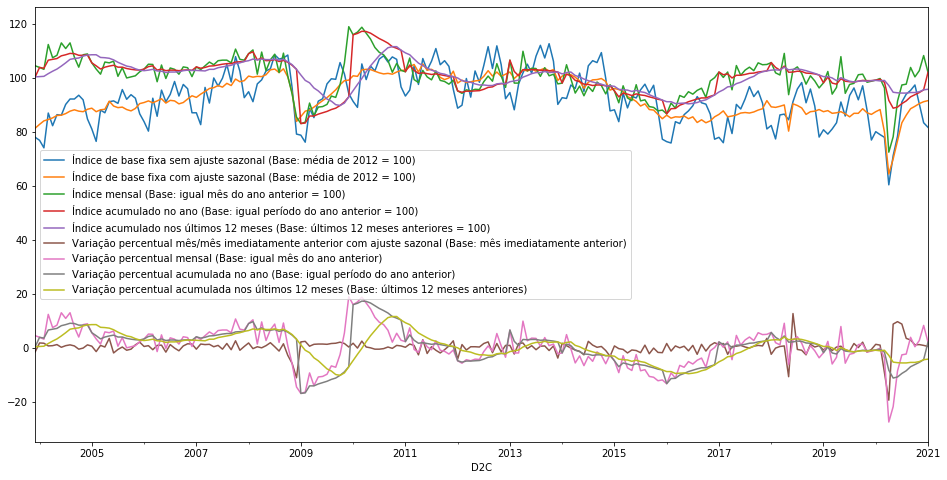

In [20]:
pim.plot(figsize=(16,8))

In [8]:
%%time
check = []
errors = []
for x in range(1400,1500):
    try:
        sidrapy.get_table(table_code=str(x), territorial_level="1", ibge_territorial_code="all", period="all")
        check.append(x)
    except:    
        errors.append(x)
        pass

Wall time: 1min 7s


In [ ]:
# series historicas
# ipca: 1419, ipp: 6903